<a href="https://colab.research.google.com/github/lucasst07/Challenge-Telecom-X-an-lise-de-evas-o-de-clientes---Partet-2/blob/main/TelecomX_BR_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##📚 Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

##🛠️ Preparação dos Dados

###Dicionário de dados
- customerID: número de identificação único de cada cliente
- Churn: se o cliente deixou ou não a empresa
- gender: gênero (masculino e feminino)
- SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
- Partner: se o cliente possui ou não um parceiro ou parceira
- Dependents: se o cliente possui ou não dependentes
- tenure: meses de contrato do cliente
- PhoneService: assinatura de serviço telefônico
- MultipleLines: assisnatura de mais de uma linha de telefone
- InternetService: assinatura de um provedor internet
- OnlineSecurity: assinatura adicional de segurança online
- OnlineBackup: assinatura adicional de backup online
- DeviceProtection: assinatura adicional de proteção no dispositivo
- TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
- StreamingTV: assinatura de TV a cabo
- StreamingMovies: assinatura de streaming de filmes
- Contract: tipo de contrato
- PaperlessBilling: se o cliente prefere receber online a fatura
- PaymentMethod: forma de pagamento
- Charges.Monthly: total de todos os serviços do cliente por mês
- Charges.Total: total gasto pelo cliente

In [3]:
dados = pd.read_csv('/content/dados_tratados.csv')
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily,NumAddonServices,account.Charges.Daily2,customer.tenure2
0,0002-ORFBO,No,Female,0,Yes,Yes,9,1,0,DSL,...,0,One year,Yes,Mailed check,65.60,593.30,2.186667,4,Custo diário (R$ 1.51 - 2.5),Novo Cliente (1-12 meses)
1,0003-MKNFE,No,Male,0,No,No,9,1,1,DSL,...,1,Month-to-month,No,Mailed check,59.90,542.40,1.996667,3,Custo diário (R$ 1.51 - 2.5),Novo Cliente (1-12 meses)
2,0004-TLHLJ,Yes,Male,0,No,No,4,1,0,Fiber optic,...,0,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333,2,Custo diário (R$ 1.51 - 2.5),Novo Cliente (1-12 meses)
3,0011-IGKFF,Yes,Male,1,Yes,No,13,1,0,Fiber optic,...,1,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667,5,Custo diário (2.51 - 3+),Cliente Médio (13-36 meses)
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,1,0,Fiber optic,...,0,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667,3,Custo diário (2.51 - 3+),Novo Cliente (1-12 meses)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,1,0,DSL,...,0,One year,No,Mailed check,55.15,742.90,1.838333,3,Custo diário (R$ 1.51 - 2.5),Cliente Médio (13-36 meses)
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,1,1,Fiber optic,...,1,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667,3,Custo diário (2.51 - 3+),Cliente Médio (13-36 meses)
7040,9992-UJOEL,No,Male,0,No,No,2,1,0,DSL,...,0,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667,2,Custo diário (R$ 1.51 - 2.5),Novo Cliente (1-12 meses)
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,1,0,DSL,...,1,Two year,No,Mailed check,67.85,4627.65,2.261667,5,Custo diário (R$ 1.51 - 2.5),Cliente Fiel (61+ meses)


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   int64  
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   int64  
 11  internet.OnlineBackup      7043 non-null   int64  
 12  internet.DeviceProtection  7043 non-null   int64  
 13  internet.TechSupport       7043 non-null   int64

In [5]:
# contagem de valores nulos
dados.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [6]:
#tratar os valores nulos
dados['account.Charges.Total'] = dados['account.Charges.Total'].fillna(0)
dados.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [7]:
dados = dados.drop(['account.Charges.Daily', 'account.Charges.Daily2', 'customer.tenure2'], axis=1)
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,NumAddonServices
0,0002-ORFBO,No,Female,0,Yes,Yes,9,1,0,DSL,...,0,1,1,0,One year,Yes,Mailed check,65.60,593.30,4
1,0003-MKNFE,No,Male,0,No,No,9,1,1,DSL,...,0,0,0,1,Month-to-month,No,Mailed check,59.90,542.40,3
2,0004-TLHLJ,Yes,Male,0,No,No,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,Yes,Electronic check,73.90,280.85,2
3,0011-IGKFF,Yes,Male,1,Yes,No,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,Yes,Electronic check,98.00,1237.85,5
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,Yes,Mailed check,83.90,267.40,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,1,0,DSL,...,0,1,0,0,One year,No,Mailed check,55.15,742.90,3
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,Yes,Electronic check,85.10,1873.70,3
7040,9992-UJOEL,No,Male,0,No,No,2,1,0,DSL,...,0,0,0,0,Month-to-month,Yes,Mailed check,50.30,92.75,2
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,1,0,DSL,...,1,1,0,1,Two year,No,Mailed check,67.85,4627.65,5


In [8]:
dados_encoded = pd.get_dummies(dados, drop_first=True)
dados_encoded.head()

,customer.SeniorCitizen,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,...,customer.Partner_Yes,customer.Dependents_Yes,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,1,0,0,1,0,1,1,0,...,True,True,False,False,True,False,True,False,False,True
1,0,9,1,1,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,True
2,0,4,1,0,0,0,1,0,0,0,...,False,False,True,False,False,False,True,False,True,False
3,1,13,1,0,0,1,1,0,1,1,...,True,False,True,False,False,False,True,False,True,False
4,1,3,1,0,0,0,0,1,1,0,...,True,False,True,False,False,False,True,False,False,True


In [9]:
#contagem dos valores da coluna evasão
dados['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [10]:
churn_proportion = dados['Churn'].value_counts(normalize=True)
churn_proportion

,proportion
Churn,
No,0.73463
Yes,0.26537


##🎯 Correlação e Seleção de Variáveis

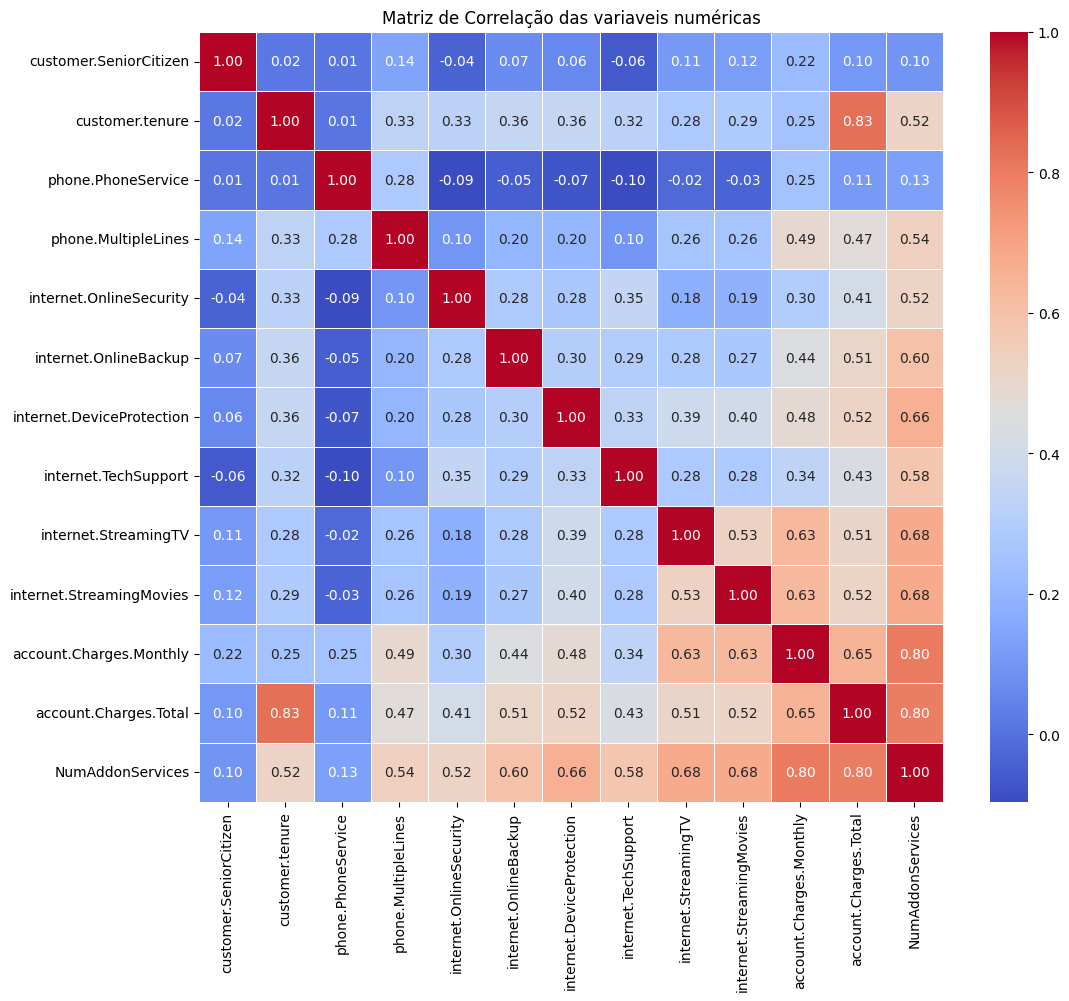

In [15]:
# Select only numerical columns for correlation matrix
numerical_cols = dados.select_dtypes(include=np.number).columns
correlation_matriz = dados[numerical_cols].corr()

# Plot the correlation matriz as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matriz, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das variaveis numéricas')
plt.show()

##🤖 Modelagem Preditiva

In [12]:
# Separar features (X) e alvo (y) e remover ID
X = dados.drop(['Churn'], axis=1)
y = dados['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Converte 'Yes'/'No' para 1/0

# Aplicar One-Hot Encoding nas variáveis categóricas
X = pd.get_dummies(X, drop_first=True) # drop_first=True ajuda a evitar multicolinearidade

# Dividir em treino e teste (ANTES de escalar)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # Essencial para dados desbalanceados
)

# Escalonar apenas as variáveis numéricas
colunas_numericas = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'NumAddonServices']
scaler = StandardScaler()

# Ajusta o scaler APENAS nos dados de treino
X_train[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])

# Transforma os dados de teste com o scaler já ajustado
X_test[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

print("Dados preparados e divididos!\n")
print("Formato de X_train:", X_train.shape)
print("Formato de X_test:", X_test.shape)

Dados preparados e divididos!

Formato de X_train: (4930, 7066)
Formato de X_test: (2113, 7066)


In [13]:
# Inicializa os modelos
log_reg = LogisticRegression(random_state=42, max_iter=1000)
random_forest = RandomForestClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

# Treina os modelos
print("Treinando Regressão Logística...")
# Drop rows with NaN values in X_train before training
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train[X_train_cleaned.index] # Keep corresponding y_train values

log_reg.fit(X_train_cleaned, y_train_cleaned)

print("Treinando Random Forest...")
random_forest.fit(X_train_cleaned, y_train_cleaned)

print("Treinando LightGBM...")
lgbm.fit(X_train_cleaned, y_train_cleaned)

print("\nModelos treinados com sucesso!")

Treinando Regressão Logística...
Treinando Random Forest...
Treinando LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1308, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 634
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265314 -> initscore=-1.018527
[LightGBM] [Info] Start training from score -1.018527

Modelos treinados com sucesso!


--- Avaliação do Modelo: Regressão Logística ---
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

AUC-ROC Score: 0.8403



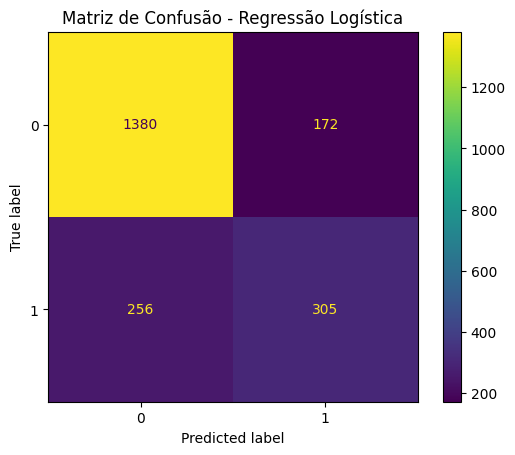

--- Avaliação do Modelo: Random Forest ---
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1552
           1       0.64      0.45      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.69      2113
weighted avg       0.77      0.79      0.77      2113

AUC-ROC Score: 0.8297



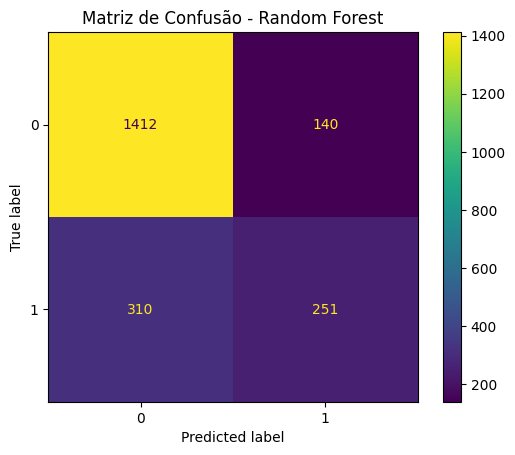

--- Avaliação do Modelo: LightGBM ---
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1552
           1       0.61      0.53      0.56       561

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.78      0.78      0.78      2113

AUC-ROC Score: 0.8247



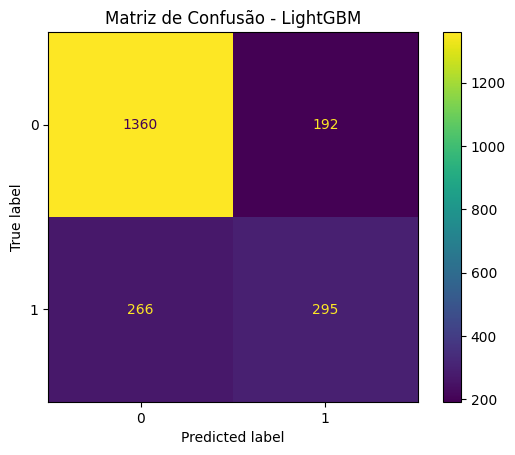

In [14]:
# Dicionário para armazenar os modelos
modelos = {
    "Regressão Logística": log_reg,
    "Random Forest": random_forest,
    "LightGBM": lgbm
}

# Avalia cada modelo
for nome, modelo in modelos.items():
    # Clean X_test by dropping rows with NaN values
    X_test_cleaned = X_test.dropna()
    y_test_cleaned = y_test[X_test_cleaned.index]

    # Faz as previsões nos dados de teste
    y_pred = modelo.predict(X_test_cleaned)
    y_proba = modelo.predict_proba(X_test_cleaned)[:, 1] # Probabilidades para AUC

    # Imprime os resultados
    print(f"--- Avaliação do Modelo: {nome} ---")
    print(classification_report(y_test_cleaned, y_pred))
    print(f"AUC-ROC Score: {roc_auc_score(y_test_cleaned, y_proba):.4f}\n")

    # Plota a Matriz de Confusão
    cm = confusion_matrix(y_test_cleaned, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Matriz de Confusão - {nome}')
    plt.show()

##📋  Interpretação e Conclusões


# Conclusão Estratégica: Da Análise à Ação Preditiva de Churn

A construção de modelos preditivos representou a evolução natural da análise exploratória, permitindo-nos não apenas entender o churn passado, mas prever o churn futuro.  

A avaliação dos três modelos (**Regressão Logística**, **Random Forest** e **LightGBM**) revelou que, embora todos tenham apresentado um bom desempenho geral (**AUC-ROC > 0.82**), o modelo de **Regressão Logística** se destacou como a ferramenta mais equilibrada e eficaz para os objetivos de negócio da TelecomX, com um **AUC de 0.84** e o melhor balanço entre *Recall* e *Precision*.  

Este modelo nos permite identificar proativamente mais da metade dos clientes em risco de evasão com um alto grau de confiança, tornando-se um ativo estratégico fundamental. A seguir, detalhamos os insights gerados e as ações recomendadas.

---

## Quem são os clientes com maior risco de evasão?

A análise dos dados e o comportamento do modelo nos permitem traçar um perfil claro do cliente com maior propensão ao churn. Não se trata de um único fator, mas da combinação de características contratuais, temporais e de serviço. O perfil de maior risco é:

- **O Cliente "Livre e Recente"**  
  Possui um contrato **mensal (Month-to-month)** e está nos seus primeiros **12 meses** com a empresa (**tenure baixo**). A ausência de vínculo de longo prazo e a fase inicial de adaptação criam uma janela de alto risco para o cancelamento.

- **O Cliente de "Fibra Insatisfeito"**  
  Clientes que assinam o serviço de **Internet de Fibra Óptica** aparecem com frequência no grupo de churn. Isso não significa necessariamente baixa qualidade, mas sim que está associado a uma **cobrança mensal mais alta**. Se o valor percebido não justifica o custo, especialmente sem serviços de suporte, a evasão se torna atraente.

- **O Cliente "Básico" e sem Suporte**  
  Um cliente que não contrata serviços de valor agregado, como **TechSupport** ou **OnlineSecurity**, tem menos "pontos de ancoragem" com a empresa. Qualquer problema técnico pesa mais, já que ele não possui canais de suporte prioritário.

---

## Quais variáveis mais influenciam esse comportamento?

O modelo preditivo confirmou que as seguintes variáveis são os principais *drivers* do churn, em ordem de importância:

1. **Tipo de Contrato (Contract):** A variável mais influente. O contrato **mensal** é o maior indicador de risco.  
2. **Tempo de Contrato (tenure):** Quanto menor o tenure, maior a probabilidade de churn.  
3. **Cobrança Mensal (Charges.Monthly):** Valores altos sem contrapartida clara aceleram o cancelamento.  
4. **Serviço de Internet (InternetService):** Especialmente a **Fibra Óptica**, pela correlação com preços mais altos.  

---

## Que tipo de perfil a empresa precisa manter mais próximo?

Para reduzir o churn, a TelecomX deve cultivar o perfil de cliente mais leal e de baixo risco. Este é o **"cliente ideal"**:

- **O Cliente "Comprometido e Veterano"**  
  Contrato de **1 ou 2 anos** e mais de **24 meses de tenure**. O vínculo de longo prazo o torna resiliente ao churn.  

- **O Cliente "Integrado ao Ecossistema"**  
  Consome múltiplos serviços de valor agregado (**TechSupport**, **OnlineBackup**, **DeviceProtection**). Cada serviço adicional aumenta receita, dependência e satisfação.  

- **O Cliente Familiar e Estável**  
  Clientes com **Partner** e **Dependents** apresentam menor taxa de churn. A estabilidade pessoal se reflete na relação com a empresa.  

---

## Recomendações Estratégicas Acionáveis

Com base nestes perfis, a TelecomX pode implementar as seguintes ações direcionadas:

### 1. Programa de "Blindagem" para Novos Clientes
- **Ação:** Criar campanha para clientes **mensais entre o 3º e 6º mês**, oferecendo desconto ou serviço gratuito (ex: 6 meses de TechSupport) para migrarem para contrato anual.  
- **Objetivo:** Aumentar a barreira de saída no período mais crítico.  

### 2. Estratégia de Valor para Clientes de Fibra Óptica
- **Ação:** Incluir **TechSupport** ou **OnlineSecurity** como benefício padrão nos pacotes de Fibra de maior valor.  
- **Objetivo:** Justificar o preço mais alto e transformar um ponto de atrito em diferencial competitivo.  

### 3. Campanha de "Adoção de Ecossistema"
- **Ação:** Usar o modelo preditivo para gerar lista semanal de clientes em risco e oferecer pacotes adicionais com desconto agressivo no primeiro ano.  
- **Objetivo:** Aumentar a **aderência (stickiness)** do cliente, dificultando a evasão.  

---

## Conclusão

Ao implementar estas estratégias, a **TelecomX** passará de uma postura **reativa** para uma gestão de clientes **proativa e preditiva**, utilizando dados para:

- Proteger a receita  
- Aumentar a lealdade  
- Construir uma base de clientes mais sólida e rentável  
